# Importando as bibliotecas:

In [ ]:
# Importando utilitários
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sns

# Importando o modelo
from sklearn.ensemble import RandomForestClassifier

# Importando utilitários para o treino
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Importando bibliotecas focadas em nlp:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Importando os tranformadores para bow e tfidf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Baixndo os recursos necessários da nlkt:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Carregando o dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
caminho_dataset = '/content/drive/MyDrive/fakenews.csv'

dados = pd.read_csv(caminho_dataset)

# Exibindo as primeiras linhas do DataFrame para verificar se foi carregado corretamente
print(dados.head())

                                                text  label
0  Get the latest from TODAY Sign up for our news...      1
1  2d  Conan On The Funeral Trump Will Be Invited...      1
2  It’s safe to say that Instagram Stories has fa...      0
3  Much like a certain Amazon goddess with a lass...      0
4  At a time when the perfect outfit is just one ...      0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4986 non-null   object
 1   label   4986 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.0+ KB


In [ ]:
# buscando duplicatas:
dados.duplicated().sum()

237

In [ ]:
# removendo as duplicatas:
dados = dados.drop_duplicates()

# buscando novamente:
dados.duplicated().sum()

0

# Análise dos Dados:

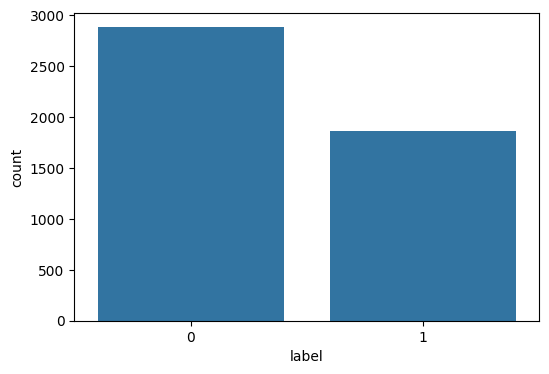

In [ ]:
# Verificando o balanceamento das labels:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=dados)
plt.show()

# Processamento de dados:

In [ ]:
def pre_proc(dataset):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    for i, texto in enumerate(dataset['text']):
        # Tokenização
        texto =  re.findall(r'[a-zA-Z]+', texto)
        # Remoção das stop_words e transformando para lower case
        texto = [palavra for palavra in texto if not palavra.lower() in stop_words]
        # Aplicação do stemming
        texto = [stemmer.stem(word) for word in texto]
        # Juntando as palavras novamente em uma string
        texto = " ".join(texto)

        # Atribuindo o texto modificado de volta à coluna 'text' do dataframe
        dataset.loc[i, 'text'] = texto

    return dataset

In [ ]:
dados = pre_proc(dados)
print(dados['text'].head())

0    get latest today sign newslett one ever truli ...
1                     conan funer trump invit conan tb
2    safe say instagram stori far surpass competito...
3    much like certain amazon goddess lasso height ...
4    time perfect outfit one click away high demand...
Name: text, dtype: object


In [ ]:
# Instanciando o CountVectorizer, binary=True faz a codificacao binaria
vectorizer = CountVectorizer(binary=True, max_features=10000)

textos = dados['text']

# Vetorizando o texto
bow = vectorizer.fit_transform(textos)

In [ ]:
# Instanciando o TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=10000)

# Vetorizando
tfidf = tfidf_vect.fit_transform(textos)

In [ ]:
print(bow.shape)
print()
print(tfidf.shape)

(4986, 10000)

(4986, 10000)


# Realizando treinamentos:

In [ ]:
# Escolha um dos processamentos para utilizar no treino:
nome = 'tfidf'

if (nome == 'bow'):
  X_train, X_test, y_train, y_test = train_test_split(bow, dados['label'], test_size=0.2, random_state = 42)
else:
  X_train, X_test, y_train, y_test = train_test_split(tfidf, dados['label'], test_size=0.2, random_state = 42)

# Exibir os tamanhos dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treino: 3988
Tamanho do conjunto de teste: 998


In [ ]:
# Instanciar os modelos
modelo_floresta_decisao = RandomForestClassifier()

# Lista de modelos
modelos = [
    ("Floresta de Decisão", modelo_floresta_decisao)
]

classes = {
    1.0: "Fake",
    0.0: "Real"
}

In [ ]:
# Iterar sobre cada modelo
for nome_modelo, modelo in modelos:
    print(f"Treinando modelo {nome_modelo}...")
    inicio = time.time()
    modelo.fit(X_train, y_train)  # Treinar o modelo
    fim = time.time()
    tempo_decorrido = fim - inicio
    print(f"Tempo de treinamento: {tempo_decorrido:.2f} segundos\n")

Treinando modelo Floresta de Decisão...
Tempo de treinamento: 10.22 segundos



In [ ]:
def plotagem(conf_matrix, nome_modelo):
    # Plotar a matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes.values(), yticklabels=classes.values())
    plt.xlabel('Valores Preditos')
    plt.ylabel('Valores Reais')
    plt.title(f'Matriz de Confusão: {nome_modelo}')
    plt.show()

Testando modelo Floresta de Decisão...
Acurácia: 0.7916
Precisão: 0.8914
Recall: 0.5707
F1: 0.6959
Matriz de confusão: 


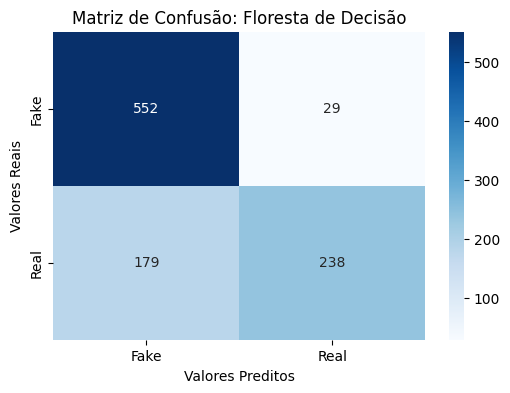

Tempo de teste: 0.11 segundos



In [ ]:
# Iterar sobre cada modelo
for nome_modelo, modelo in modelos:
    print(f"Testando modelo {nome_modelo}...")
    inicio = time.time()  # Marcar o tempo de início do teste
    y_pred = modelo.predict(X_test)  # Fazer previsões nos dados de teste
    fim = time.time()  # Marcar o tempo de término do teste
    tempo_decorrido = fim - inicio  # Calcular o tempo decorrido

    # Avaliar o desempenho do modelo
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Precisão: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}")
    print(f"Matriz de confusão: ")
    plotagem(conf_matrix, nome_modelo)
    print(f"Tempo de teste: {tempo_decorrido:.2f} segundos\n")

# Realizando predições em novos textos:

In [ ]:
def processamento(texto):
  stop_words = set(stopwords.words('english'))
  stemmer = PorterStemmer()

  # Tokenização
  texto =  re.findall(r'[a-zA-Z]+', texto)
  # Remoção das stop_words e transformando para lower case
  texto = [palavra for palavra in texto if not palavra.lower() in stop_words]
  # Aplicação do stemming
  texto = [stemmer.stem(word) for word in texto]
  # Juntando as palavras novamente em uma string
  texto = " ".join(texto)

  # Atribuindo o texto modificado de volta à coluna 'text' do dataframe
  return texto

In [ ]:
def nova_predicao(texto):

  texto = processamento(texto)

  if (nome == 'bow'):
    texto_vetorizado = vectorizer.transform([texto])
  else:
    texto_vetorizado = tfidf_vect.transform([texto])

  pred = modelo.predict(texto_vetorizado)

  if pred == 0:
    print("Essa é uma mensagem real.")
  else:
    print("Essa é uma fake news.")

In [ ]:
while True:
  texto = input('Qual informação você quer compartilhar?\n')
  if texto == 'sair':
    print("Até a próxima!")
    break
  else:
    nova_predicao(texto)

Qual informação você quer compartilhar?
sair
Até a próxima!
